In [20]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.path as mpath
import sys
sys.path.append('/remote/tychodata/ftairli/work/Projects/HexConvTest/Models')

In [21]:
plt.rcParams['figure.figsize'] = [15, 12]

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


X_test = torch.load('../Data/NormData/X_test.pt').to(device)
logE_test = torch.load('../Data/NormData/Y_E_test.pt').to(device)
core_test = torch.load('../Data/NormData/Y_Core_test.pt').to(device)
axis_test = torch.load('../Data/NormData/Y_Axis_test.pt').to(device)
Xmax_test = torch.load('../Data/NormData/Y_Xmax_test.pt').to(device)


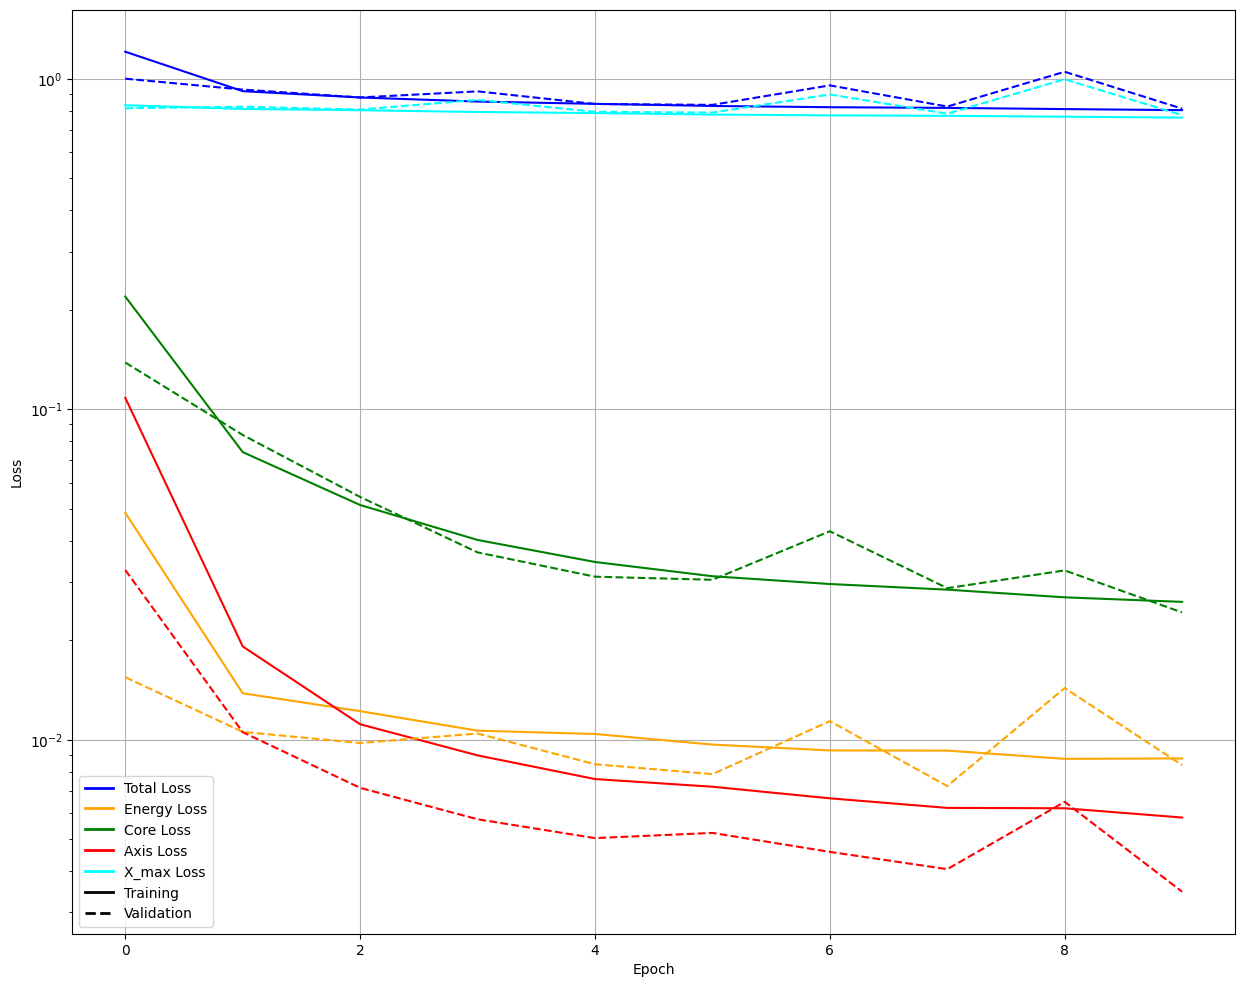

In [23]:
model = torch.load('../Models/Model_2_0.pt')

weights = np.asarray(model.LossCoefficients)
weights[np.where(weights==0)] = 1



E_loss = np.asarray(model.E_Loss_history)/weights[0]
C_loss = np.asarray(model.C_Loss_history)/weights[1]
A_loss = np.asarray(model.A_Loss_history)/weights[2]
X_loss = np.asarray(model.X_Loss_history)/weights[3]
T_loss = E_loss + C_loss + A_loss + X_loss

E_loss_val = np.asarray(model.E_Loss_history_val)/weights[0]
C_loss_val = np.asarray(model.C_Loss_history_val)/weights[1]
A_loss_val = np.asarray(model.A_Loss_history_val)/weights[2]
X_loss_val = np.asarray(model.X_Loss_history_val)/weights[3]
T_loss_val = E_loss_val + C_loss_val + A_loss_val + X_loss_val

# Define colors
colors = ['blue', 'orange', 'green', 'red','cyan']

# Plot training loss
plt.plot(T_loss, color=colors[0], label='Total Loss - Training')
plt.plot(E_loss, color=colors[1], label='Energy Loss - Training')
plt.plot(C_loss, color=colors[2], label='Core Loss - Training')
plt.plot(A_loss, color=colors[3], label='Axis Loss - Training')
plt.plot(X_loss, color=colors[4], label='Xmax Loss - Training')

# Plot validation loss
plt.plot(T_loss_val, color=colors[0], linestyle='dashed', label='Total Loss - Validation')
plt.plot(E_loss_val, color=colors[1], linestyle='dashed', label='Energy Loss - Validation')
plt.plot(C_loss_val, color=colors[2], linestyle='dashed', label='Core Loss - Validation')
plt.plot(A_loss_val, color=colors[3], linestyle='dashed', label='Axis Loss - Validation')
plt.plot(X_loss_val, color=colors[4], linestyle='dashed', label='Xmax Loss - Validation')

# Set up custom legend

custom_lines = [Line2D([0], [0], color=colors[0], lw=2),
                Line2D([0], [0], color=colors[1], lw=2),
                Line2D([0], [0], color=colors[2], lw=2),
                Line2D([0], [0], color=colors[3], lw=2),
                Line2D([0], [0], color=colors[4], lw=2),
                Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', linestyle='dashed', lw=2)]

plt.legend(custom_lines, ['Total Loss', 'Energy Loss', 'Core Loss', 'Axis Loss','X_max Loss', 'Training', 'Validation'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid()
plt.show()


In [24]:
print(X_test.shape)
logE_pred = np.zeros(shape = (X_test.shape[0],1))
core_pred = np.zeros(shape = (X_test.shape[0],2))
axis_pred = np.zeros(shape = (X_test.shape[0],3))
Xmax_pred = np.zeros(shape = (X_test.shape[0],1))

for i in range(94):
    indices = np.arange(i*1000, (i+1)*1000)
    # print(indices)
    print(f'\r {i}', end='')
    Results = model(X_test[indices])
    logE_pred[indices] = Results[0].cpu().detach().numpy()
    core_pred[indices] = Results[1].cpu().detach().numpy()
    axis_pred[indices] = Results[2].cpu().detach().numpy()
    Xmax_pred[indices] = Results[3].cpu().detach().numpy()
        
indices = np.arange(94000, X_test.shape[0])
Results =model(X_test[indices])
logE_pred[indices] = Results[0].cpu().detach().numpy()
core_pred[indices] = Results[1].cpu().detach().numpy()
axis_pred[indices] = Results[2].cpu().detach().numpy()
Xmax_pred[indices] = Results[3].cpu().detach().numpy()
# print(Test_Predictions.shape)

del model


torch.Size([94549, 3, 11, 11])
 93

In [25]:
# Normalise the values:

Xmax_MEAN     = 750.0
Xmax_STD      = 66.80484050442804 
GlobalTimeSTD = 4094.8664907986326 # dont need to include seconds, as they are always same for simulations
E_MEAN        = 19.0
Norm_LEN      = 750.0
Norm_SIG      = np.log10(10+1) # Normalise for unity at 100 vem + for log10

logE_pred = (logE_pred+E_MEAN)
Xmax_pred = Xmax_pred*Xmax_STD + Xmax_MEAN
core_pred = core_pred*Norm_LEN
# Axis is already normalised

logE_test = (logE_test+E_MEAN)
Xmax_test = Xmax_test*Xmax_STD + Xmax_MEAN
core_test = core_test*Norm_LEN
# Axis is already normalised

logE_test = logE_test.cpu().detach().numpy()
Xmax_test = Xmax_test.cpu().detach().numpy()
core_test = core_test.cpu().detach().numpy()
axis_test = axis_test.cpu().detach().numpy()

In [26]:

bad_indices = np.where((axis_pred[:,2] ==0 ))

# logE_pred = logE_pred[bad_indices]
# Xmax_pred = Xmax_pred[bad_indices]
# core_pred = core_pred[bad_indices]
# axis_pred = axis_pred[bad_indices]

# logE_test = logE_test[bad_indices]
# Xmax_test = Xmax_test[bad_indices]
# core_test = core_test[bad_indices]
# axis_test = axis_test[bad_indices]


print(np.asarray(bad_indices).shape)

(1, 0)


Text(0.5, 1.0, 'Energy Prediction')

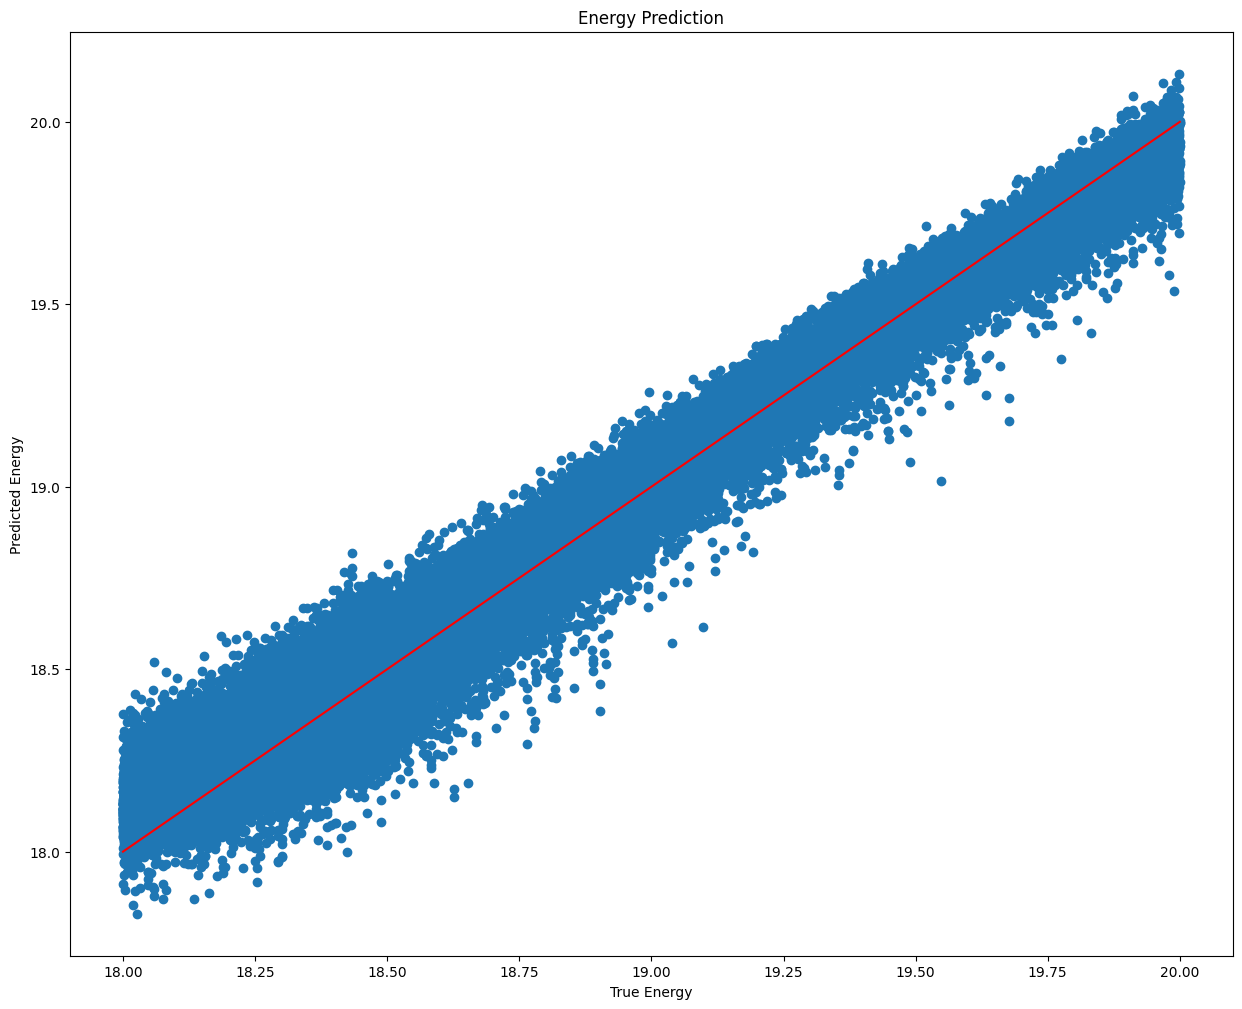

In [27]:
plt.scatter(logE_test,logE_pred)
plt.plot([18,20],[18,20],color ='red')
plt.xlabel('True Energy')
plt.ylabel('Predicted Energy')
plt.title('Energy Prediction')

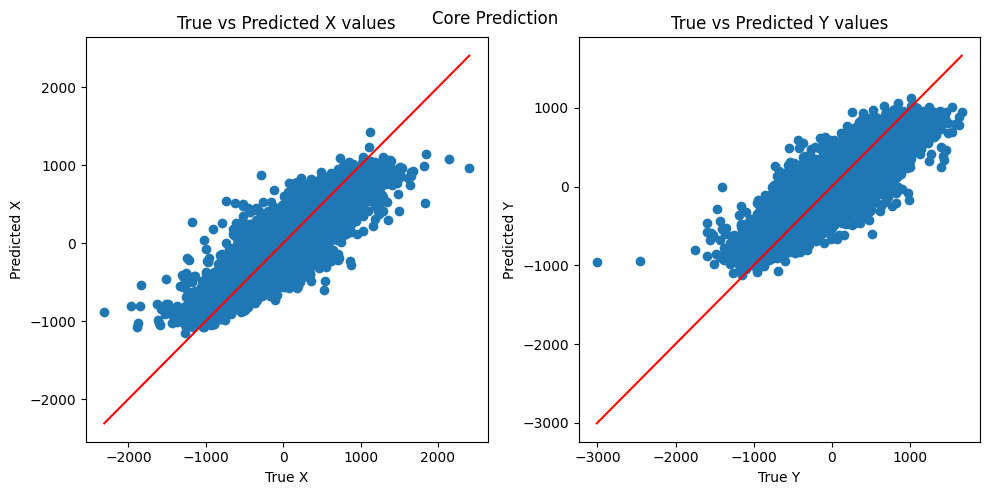

In [28]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
true_x = core_test[:,0]
pred_x = core_pred[:,0]
true_y = core_test[:,1]
pred_y = core_pred[:,1]

# plot for X values
axs[0].scatter(true_x, pred_x)
axs[0].plot([min(true_x), max(true_x)], [min(true_x), max(true_x)], color='red')  # ideal line
axs[0].set_xlabel('True X')
axs[0].set_ylabel('Predicted X')
axs[0].set_title('True vs Predicted X values')

# plot for Y values
axs[1].scatter(true_y, pred_y)
axs[1].plot([min(true_y), max(true_y)], [min(true_y), max(true_y)], color='red')  # ideal line
axs[1].set_xlabel('True Y')
axs[1].set_ylabel('Predicted Y')
axs[1].set_title('True vs Predicted Y values')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
plt.suptitle('Core Prediction')
plt.show()

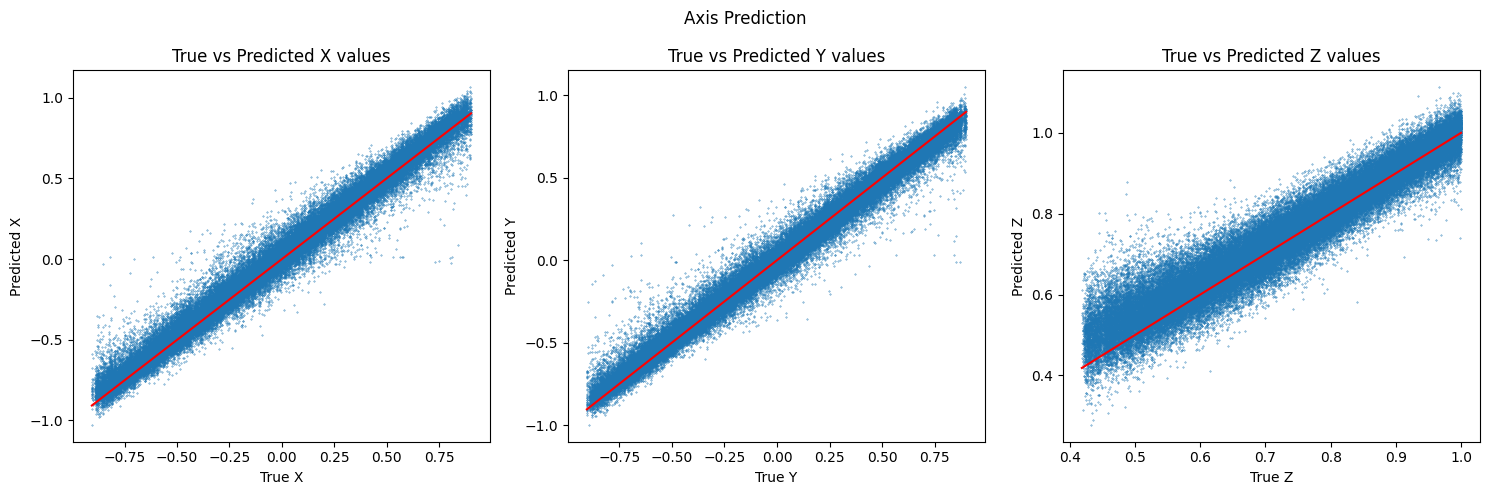

In [29]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(axis_test[:,0],axis_pred[:,0],s=0.1)
ax[0].plot([min(axis_test[:,0]), max(axis_test[:,0])], [min(axis_test[:,0]), max(axis_test[:,0])], color='red')  # ideal line
ax[0].set_xlabel('True X')
ax[0].set_ylabel('Predicted X')
ax[0].set_title('True vs Predicted X values')

ax[1].scatter(axis_test[:,1],axis_pred[:,1],s=0.1)
ax[1].plot([min(axis_test[:,1]), max(axis_test[:,1])], [min(axis_test[:,1]), max(axis_test[:,1])], color='red')  # ideal line
ax[1].set_xlabel('True Y')
ax[1].set_ylabel('Predicted Y')
ax[1].set_title('True vs Predicted Y values')

ax[2].scatter(axis_test[:,2],axis_pred[:,2],s=0.1)
ax[2].plot([min(axis_test[:,2]), max(axis_test[:,2])], [min(axis_test[:,2]), max(axis_test[:,2])], color='red')  # ideal line
ax[2].set_xlabel('True Z')
ax[2].set_ylabel('Predicted Z')
ax[2].set_title('True vs Predicted Z values')

plt.suptitle('Axis Prediction')
plt.tight_layout()
plt.show()


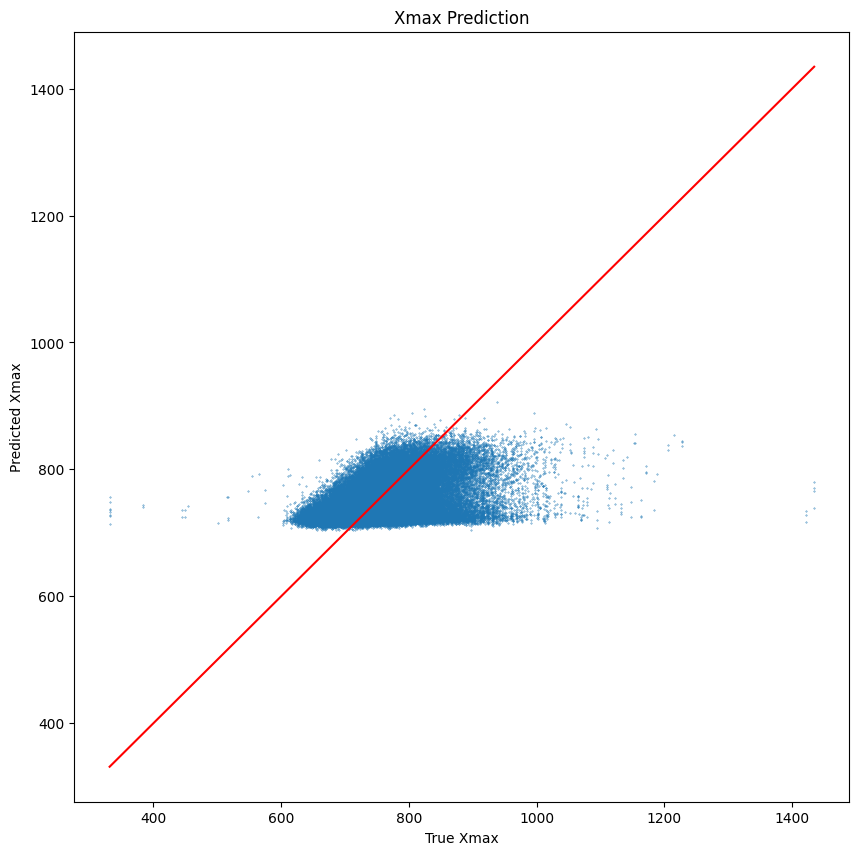

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(Xmax_test,Xmax_pred,s=0.1)
plt.plot([min(Xmax_test), max(Xmax_test)], [min(Xmax_test), max(Xmax_test)], color='red')  # ideal line
plt.xlabel('True Xmax')
plt.ylabel('Predicted Xmax')
plt.title('Xmax Prediction')
plt.show()

<Figure size 1000x1000 with 0 Axes>

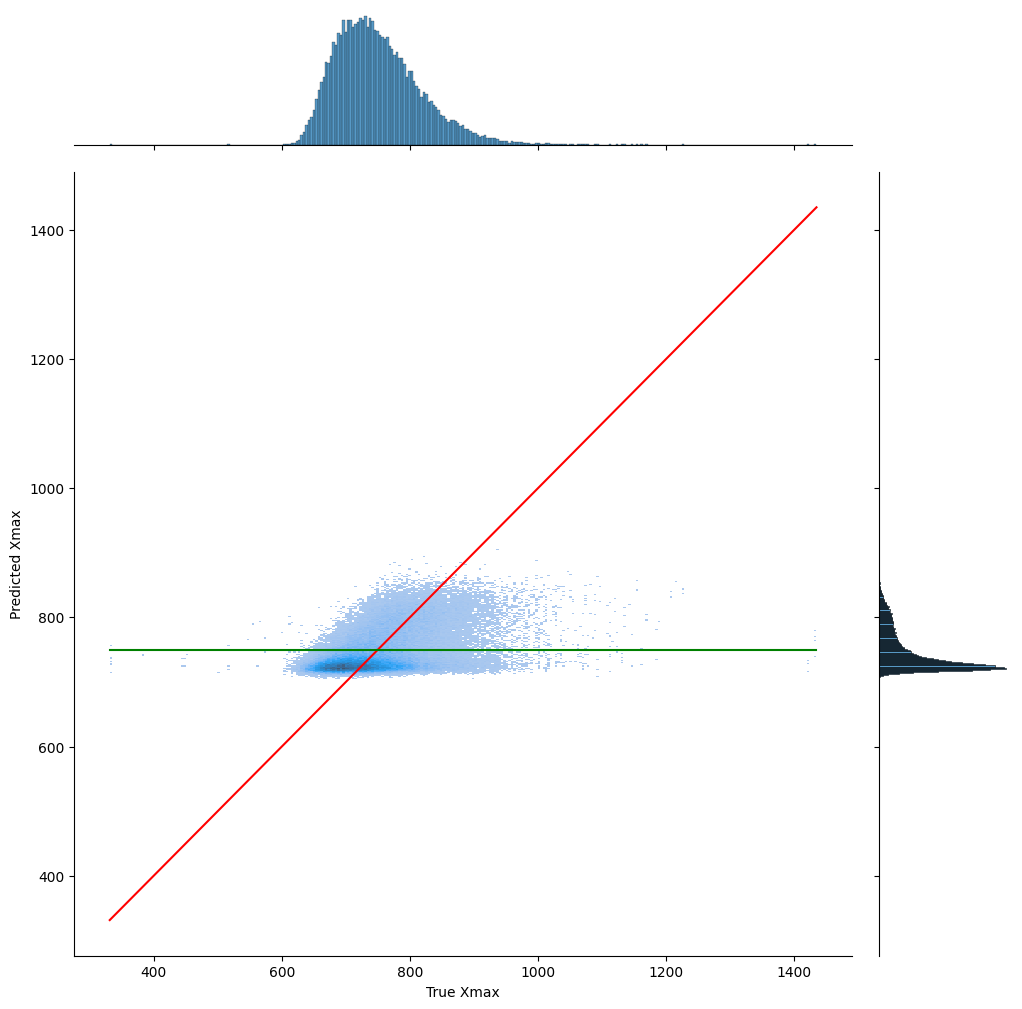

In [31]:
import seaborn as sns

# make a 2d histogram plot of Xmax and Predicted Xmax
plt.figure(figsize=(10,10))
fig = sns.jointplot(x=Xmax_test[:,0],y=Xmax_pred[:,0],kind = 'hist', height =10)
fig.ax_joint.plot([min(Xmax_test[:,0]), max(Xmax_test[:,0])], [min(Xmax_test[:,0]), max(Xmax_test[:,0])], color='red')  # ideal line
# plot line at Y=750 for the mean
fig.ax_joint.plot([min(Xmax_test[:,0]), max(Xmax_test[:,0])], [750, 750], color='green')  # ideal mean line
fig.set_axis_labels('True Xmax', 'Predicted Xmax')


In [32]:
Xmax_pred.mean()

746.3158572628207

In [33]:
def angle_between_vectors(v1, v2):
    dot_product = np.sum(v1*v2, axis=1)
    magnitude_v1 = np.linalg.norm(v1, axis=1)
    magnitude_v2 = np.linalg.norm(v2, axis=1)
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
    theta = np.arccos(np.clip(cos_theta, -1, 1)) # to avoid floating-point errors
    theta = np.degrees(theta)
    return theta

# # Substitute cause the above stopped working for some reason
# def angle_between_vectors(v1, v2):
#     dot_product = np.sum(v1*v2, axis=1)
#     theta = np.arccos(np.clip(dot_product,-1,1))
#     theta = np.degrees(theta)
#     return theta

In [34]:
E_res = np.abs(10**(logE_pred[:,0]-logE_test[:,0])-1)
C_res = np.linalg.norm(core_pred -core_test,axis =1)
A_norm = np.sqrt(axis_pred[:,0]**2 + axis_pred[:,1]**2 + axis_pred[:,2]**2)
A_res = angle_between_vectors(axis_pred,axis_test)
X_res = np.sqrt((Xmax_test[:] - Xmax_pred[:])**2)


E_res = E_res[np.where(E_res<np.percentile(E_res,99))]
C_res = C_res[np.where(C_res<np.percentile(C_res,99))]
A_res = A_res[np.where(A_res<np.percentile(A_res,99))]
X_res = X_res[np.where(X_res<np.percentile(X_res,99))]

print(E_res.shape)
print(C_res.shape)
print(A_res.shape)
print(X_res.shape)

(93603,)
(93603,)
(93603,)
(93603,)


In [35]:
axis_test.shape

(94549, 3)

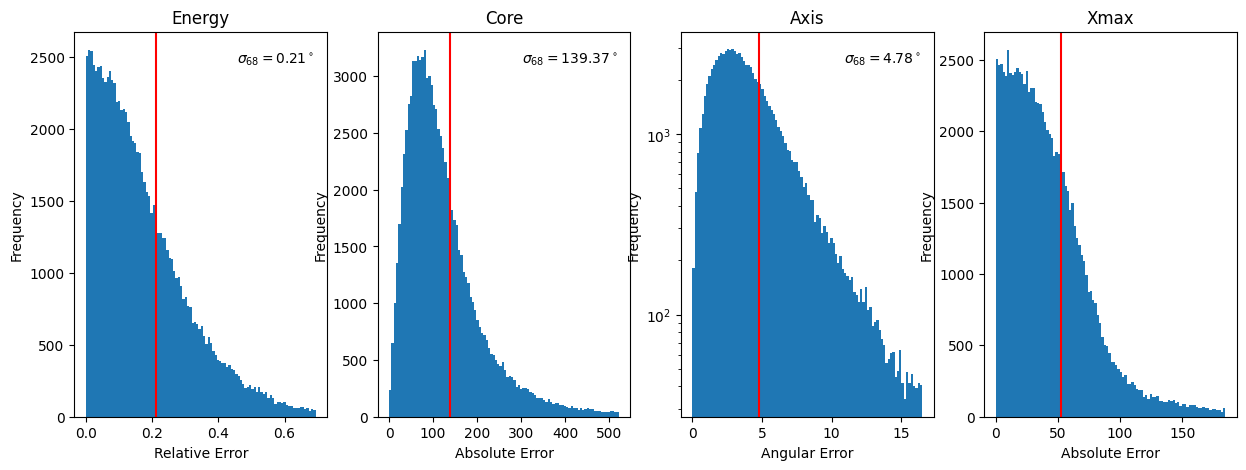

In [36]:
fig, ax = plt.subplots(1,4,figsize=(15,5))

reso = np.percentile(E_res,68)
ax[0].hist(E_res,bins=100)
ax[0].set_xlabel('Relative Error')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Energy')
# ax[0].set_yscale('log')
ax[0].axvline(reso,color='red',label='68%')
ax[0].text(0.95, 0.95, '$\sigma_{68} = %.2f^\circ$' % reso, ha='right', va='top', transform=ax[0].transAxes)


reso = np.percentile(C_res,68)
ax[1].hist(C_res,bins=100)
ax[1].set_xlabel('Absolute Error')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Core')
# ax[1].set_yscale('log')
ax[1].axvline(reso,color='red',label='68%')
ax[1].text(0.95, 0.95, '$\sigma_{68} = %.2f^\circ$' % reso, ha='right', va='top', transform=ax[1].transAxes)

reso = np.percentile(A_res,68)
ax[2].hist(A_res,bins=100)
ax[2].set_xlabel('Angular Error')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Axis')
ax[2].set_yscale('log')
ax[2].axvline(np.percentile(A_res,68),color='red',label='68%')
ax[2].text(0.95, 0.95, '$\sigma_{68} = %.2f^\circ$' % reso, ha='right', va='top', transform=ax[2].transAxes)

reso = np.percentile(X_res,68)
ax[3].hist(X_res,bins=100)
ax[3].set_xlabel('Absolute Error')
ax[3].set_ylabel('Frequency')
ax[3].set_title('Xmax')
# ax[3].set_yscale('log')
ax[3].axvline(np.percentile(X_res,68),color='red',label='68%')



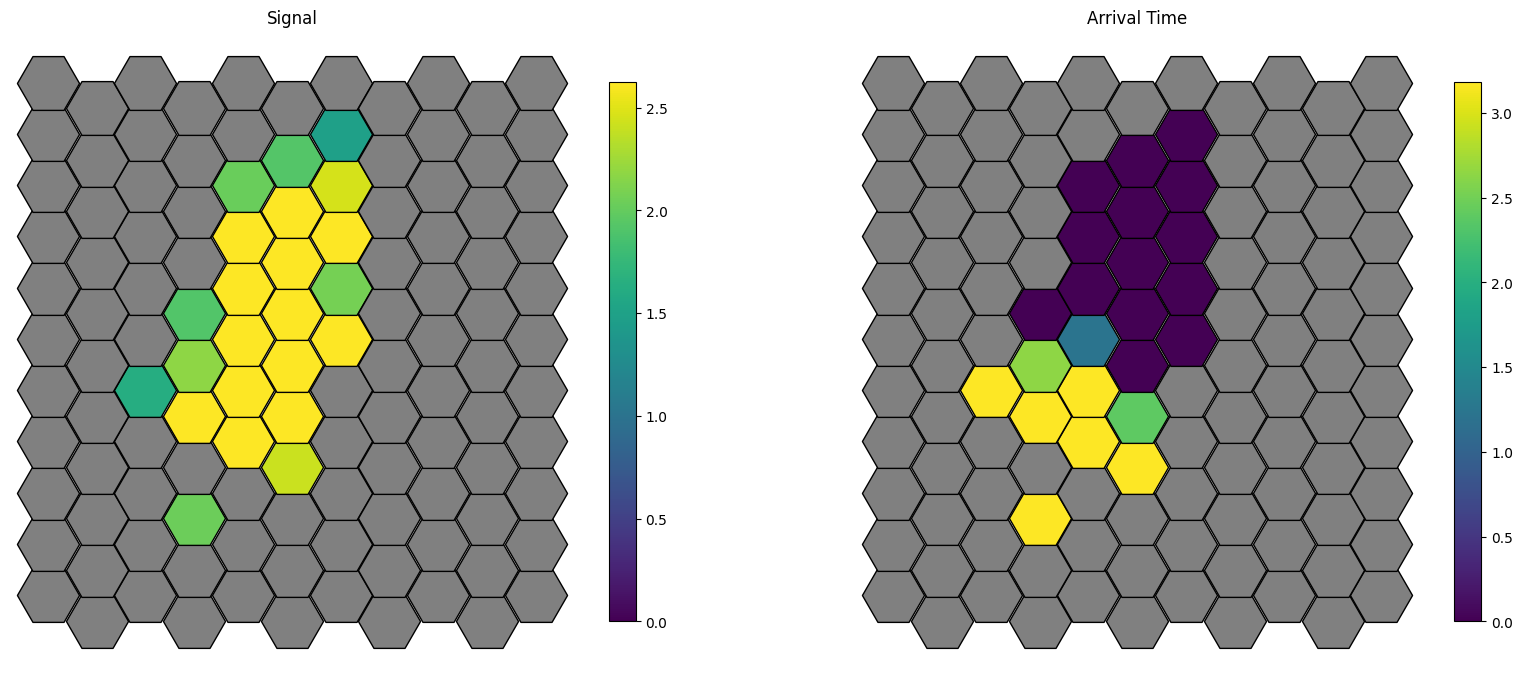

N      :  22569
Energy :  [19.75598]
Xmax   :  [830.0208]


In [37]:
from ArrayPlot import plot_hex_array

# Test the function with random data
N = np.random.randint(0, len(X_test))
singal = X_test[N,0,:,:].cpu().detach().numpy()
times = X_test[N,1,:,:].cpu().detach().numpy()
mask = X_test[N,2,:,:].cpu().detach().numpy()

plot_hex_array(singal, times, mask, S=2000)



# logE_test = torch.load('../Data/NormData/Y_E_test.pt').to(device)
# core_test = torch.load('../Data/NormData/Y_Core_test.pt').to(device)
# axis_test = torch.load('../Data/NormData/Y_Axis_test.pt').to(device)
# Xmax_test = torch.load('../Data/NormData/Y_Xmax_test.pt').to(device)

print('N      : ',N)
print('Energy : ',logE_test[N])
print('Xmax   : ',Xmax_test[N])


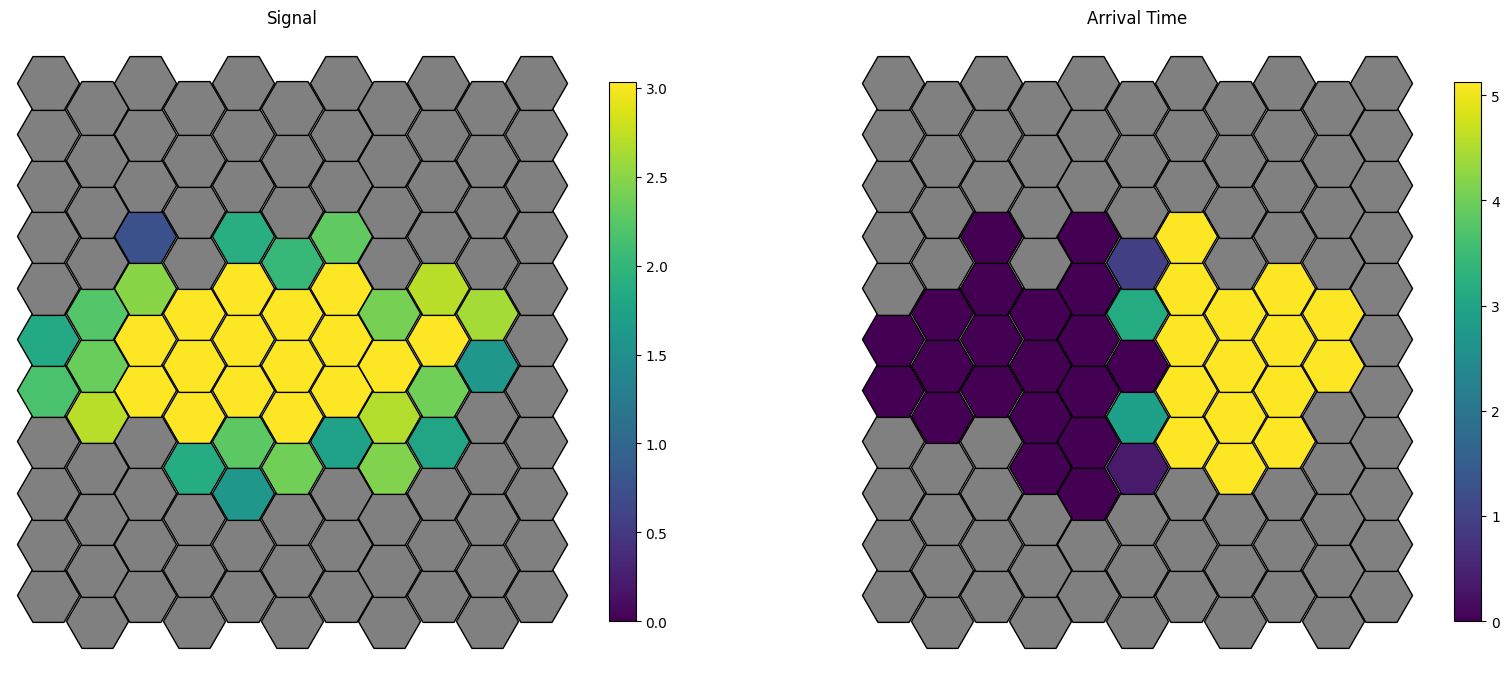

In [45]:
N = torch.argmax(   torch.sum(X_test[:,2,:,:],dim=(1,2))   )

singal = X_test[N,0,:,:].cpu().detach().numpy()
times = X_test[N,1,:,:].cpu().detach().numpy()
mask = X_test[N,2,:,:].cpu().detach().numpy()

plot_hex_array(singal, times, mask, S=2000)

(0.0, 5.0)

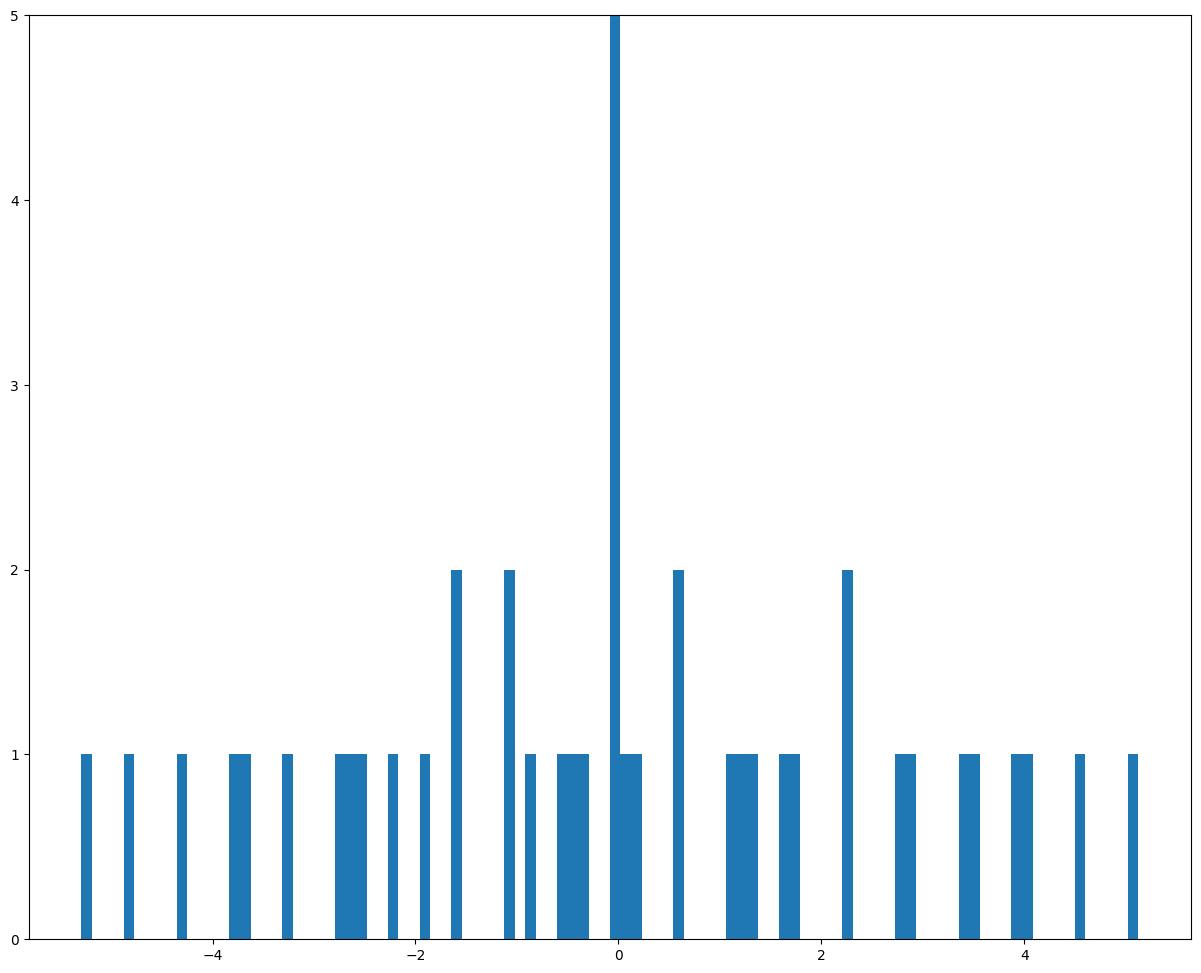

In [47]:
plt.hist(times.flatten(),bins=100)
plt.ylim(0,5)